# Identifying outliers to prioritize high-activity measurements for risk assessment


A screening campaign was performed to identify chemical products that are of potential health concern. Our main goal: <br>
visualize the dataset in the space of decision-making metrics <br>
to identify any risk groups that are outliers due to technical or human error. <br>


In [3]:
# load libraries
import os
import pandas as pd
import numpy as np
import pyod
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.font_manager
%matplotlib inline

In [4]:
# read dataset
dataset = pd.read_csv("screening_dataset.csv")
# look at dataset
dataset.describe()

,group_id,risk,prior_activity
count,7598.000000,7872.000000,7871.000000
mean,3136.902606,1.906901,0.086016
std,2237.903178,20.630979,0.125375
min,1.000000,0.000000,0.000000
25%,1063.000000,0.000000,0.009500
50%,2842.000000,0.000000,0.028700
75%,4971.750000,0.000000,0.107950
max,7605.000000,1241.945661,0.738300


In [5]:
# check missing values, drop if they exist
dataset.isna().sum()

group_id          274
risk                0
prior_activity      1
dtype: int64

In [6]:
# drop na
dataset_drop_na = dataset.dropna().reset_index(drop=True)
dataset_drop_na.isna().sum()

group_id          0
risk              0
prior_activity    0
dtype: int64

The dataset was transformed and structured previously. More cleaning needs to be done before further mining.

'group_id' is numeric instead of character. <br>
'risk' needs re-scaling. significant figures need to be reduced.

In [7]:
# re-scaling decision-metric, risk, to 0-1 range
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_drop_na[:]['risk'] = scaler.fit_transform(dataset_drop_na[['risk']])
dataset_drop_na.head()

,group_id,risk,prior_activity
0,1.0,0.0,0.0053
1,2.0,0.0,0.0461
2,3.0,0.0,0.0000
3,4.0,0.0,0.0095
4,5299.0,0.0,0.0775


In [8]:
# iterating the columns 
dataset_drop_na_round = dataset_drop_na.round({'risk': 2, 'prior_activity': 2})
dataset_drop_na_round.head()

,group_id,risk,prior_activity
0,1.0,0.0,0.01
1,2.0,0.0,0.05
2,3.0,0.0,0.00
3,4.0,0.0,0.01
4,5299.0,0.0,0.08


In [9]:
# fixing data type for group_id
dataset_drop_na_round["group_id"] =  dataset_drop_na_round["group_id"].astype(int).astype(str)

In [10]:
# adding group_size
dataset_drop_na_round['group_size'] = dataset_drop_na_round.groupby('group_id')['group_id'].transform('count')

Visualize after filtering smaller group sizes less than 4 and with risk greater than than zero.

In [11]:
# filter
dataset_size = dataset_drop_na_round[(dataset_drop_na_round.group_size > 3) ]
dataset_size_pos = dataset_size[(dataset_size.risk > 0 ) ]

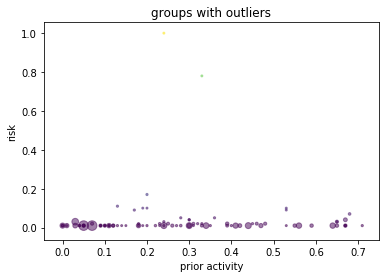

In [12]:
# Fixing random state for reproducibility
np.random.seed(19680801)


x = dataset_size_pos['group_size']
y = dataset_size_pos['risk']
z = dataset_size_pos['prior_activity']
N = len(y)

colors = y
area = x 

plt.scatter(z, y, s=x, c=colors, alpha=0.5)

plt.xlabel('prior activity')
plt.ylabel('risk')
plt.title('groups with outliers')


plt.show()